# Reconocimiento de las señales de tráfico

In [4]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np

In [5]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [6]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [7]:
images, labels = load_ml_data(train_data_dir)

In [8]:
images = np.array(images)

In [9]:
labels = np.array(labels)

In [10]:
images.ndim

1

In [16]:
images.size

4575

In [17]:
images[0]

Array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [18]:
labels.ndim

1

In [19]:
labels.size

4575

In [20]:
len(set(labels))

62

In [21]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [22]:
images.itemsize

8

In [23]:
images.nbytes

36600

In [24]:
images.nbytes/images.itemsize

4575.0

In [25]:
import matplotlib.pyplot as plt

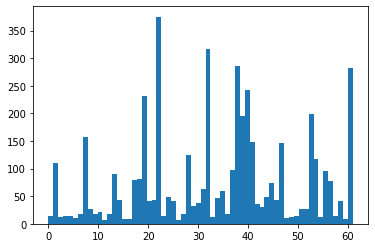

In [26]:
plt.hist(labels, len(set(labels)))
plt.show()

In [27]:
import random

In [28]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[1504, 1534, 1980, 1211, 3146, 698]

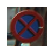

Forma:(73, 74, 3), min:3, max:252


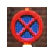

Forma:(53, 52, 3), min:0, max:255


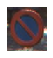

Forma:(64, 57, 3), min:17, max:255


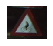

Forma:(76, 92, 3), min:7, max:170


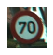

Forma:(86, 83, 3), min:5, max:255


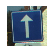

Forma:(127, 127, 3), min:5, max:255


In [31]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

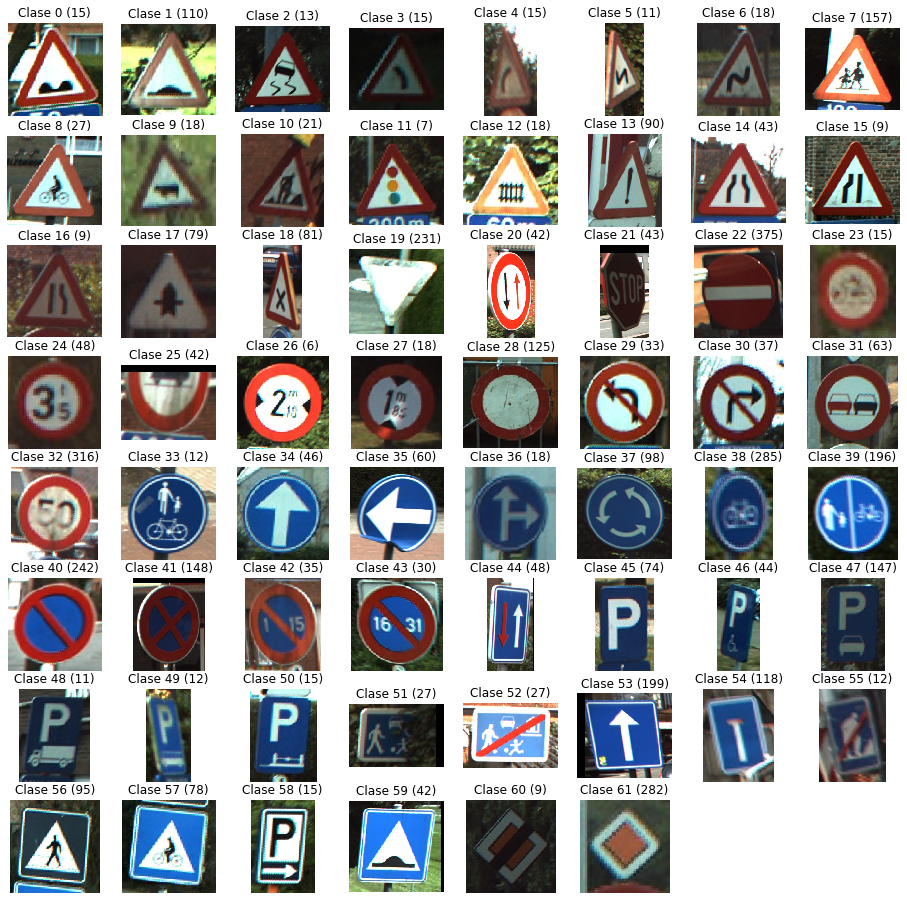

In [32]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [33]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [34]:
from skimage import transform

In [35]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [36]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [37]:
images30[0]

array([[[0.27162745, 0.40798039, 0.43156863],
        [0.43017647, 0.55527451, 0.55117647],
        [0.43343137, 0.54254902, 0.52431373],
        ...,
        [0.26235294, 0.28294118, 0.2172549 ],
        [0.24331373, 0.27588235, 0.1962549 ],
        [0.26764706, 0.30594118, 0.22058824]],

       [[0.27705882, 0.41862745, 0.43198039],
        [0.42633333, 0.55417647, 0.54470588],
        [0.43039216, 0.52441176, 0.49303922],
        ...,
        [0.30558824, 0.31647059, 0.24980392],
        [0.28098039, 0.30417647, 0.22901961],
        [0.26390196, 0.29470588, 0.21943137]],

       [[0.28823529, 0.44196078, 0.46186275],
        [0.44460784, 0.57235294, 0.55539216],
        [0.44019608, 0.52598039, 0.50245098],
        ...,
        [0.36078431, 0.32990196, 0.27058824],
        [0.34460784, 0.31019608, 0.25990196],
        [0.32862745, 0.3045098 , 0.26137255]],

       ...,

       [[0.38117647, 0.51705882, 0.50254902],
        [0.41764706, 0.5422549 , 0.51196078],
        [0.42107843, 0

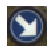

Forma:(30, 30, 3), min:0.12209150326797388, max:0.9760261437908497


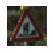

Forma:(30, 30, 3), min:0.055490196078431364, max:0.9047843137254903


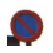

Forma:(30, 30, 3), min:0.10698801742919385, max:1.0


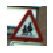

Forma:(30, 30, 3), min:0.03560784313725474, max:1.0


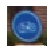

Forma:(30, 30, 3), min:0.05678104575163375, max:0.8894771241830068


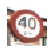

Forma:(30, 30, 3), min:0.13542483660130739, max:1.0


In [38]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [39]:
from skimage.color import rgb2gray

In [40]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

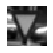

Forma:(30, 30), min:0.07340964705882348, max:0.9891935620915033


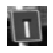

Forma:(30, 30), min:0.04101745098039222, max:0.9924623529411765


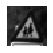

Forma:(30, 30), min:0.16116117647058817, max:0.9198286078431379


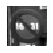

Forma:(30, 30), min:0.038766596949891326, max:0.8941265620915033


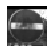

Forma:(30, 30), min:0.0, max:0.9925827189542484


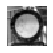

Forma:(30, 30), min:0.20037533725490211, max:0.9632566307189536


In [41]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [45]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [46]:
images_flat

<tf.Tensor 'Flatten_2/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [47]:
logits

<tf.Tensor 'fully_connected_2/Relu:0' shape=(?, 62) dtype=float32>

In [48]:
loss

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [49]:
final_pred

<tf.Tensor 'ArgMax_2:0' shape=(?,) dtype=int64>

In [51]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  7.958907
Pérdidas: 4.064901
EPOCH 50
Eficacia:  34.688087
Pérdidas: 2.1742125
EPOCH 100
Eficacia:  34.200436
Pérdidas: 1.844564
EPOCH 150
Eficacia:  33.84153
Pérdidas: 1.6848454
EPOCH 200
Eficacia:  33.774426
Pérdidas: 1.5840657
EPOCH 250
Eficacia:  33.73093
Pérdidas: 1.5126086
EPOCH 300
Eficacia:  33.643497
Pérdidas: 1.458628
EPOCH 350
Eficacia:  33.582294
Pérdidas: 1.416011
EPOCH 400
Eficacia:  33.563717
Pérdidas: 1.3812554
EPOCH 450
Eficacia:  33.47235
Pérdidas: 1.3521703
EPOCH 500
Eficacia:  33.456394
Pérdidas: 1.3272693
EPOCH 550
Eficacia:  33.385574
Pérdidas: 1.3055992
EPOCH 600
Eficacia:  33.252678
Pérdidas: 1.2865696


# Evaluación de la red neuronal

In [52]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [53]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [54]:
prediction

array([19, 17, 61, 22, 38, 32, 39, 38, 32, 38, 40, 32,  1, 41, 18, 39, 14,
       22, 40, 61, 19, 41, 39, 32, 19, 41, 40, 61, 32,  7, 40, 54, 28, 28,
       19, 32, 40, 56, 32, 18])

In [55]:
sample_labels

[19,
 11,
 61,
 22,
 38,
 29,
 39,
 38,
 32,
 38,
 40,
 32,
 1,
 41,
 18,
 34,
 14,
 22,
 40,
 61,
 19,
 41,
 58,
 32,
 19,
 22,
 40,
 61,
 24,
 7,
 29,
 54,
 59,
 59,
 19,
 32,
 38,
 56,
 32,
 18]

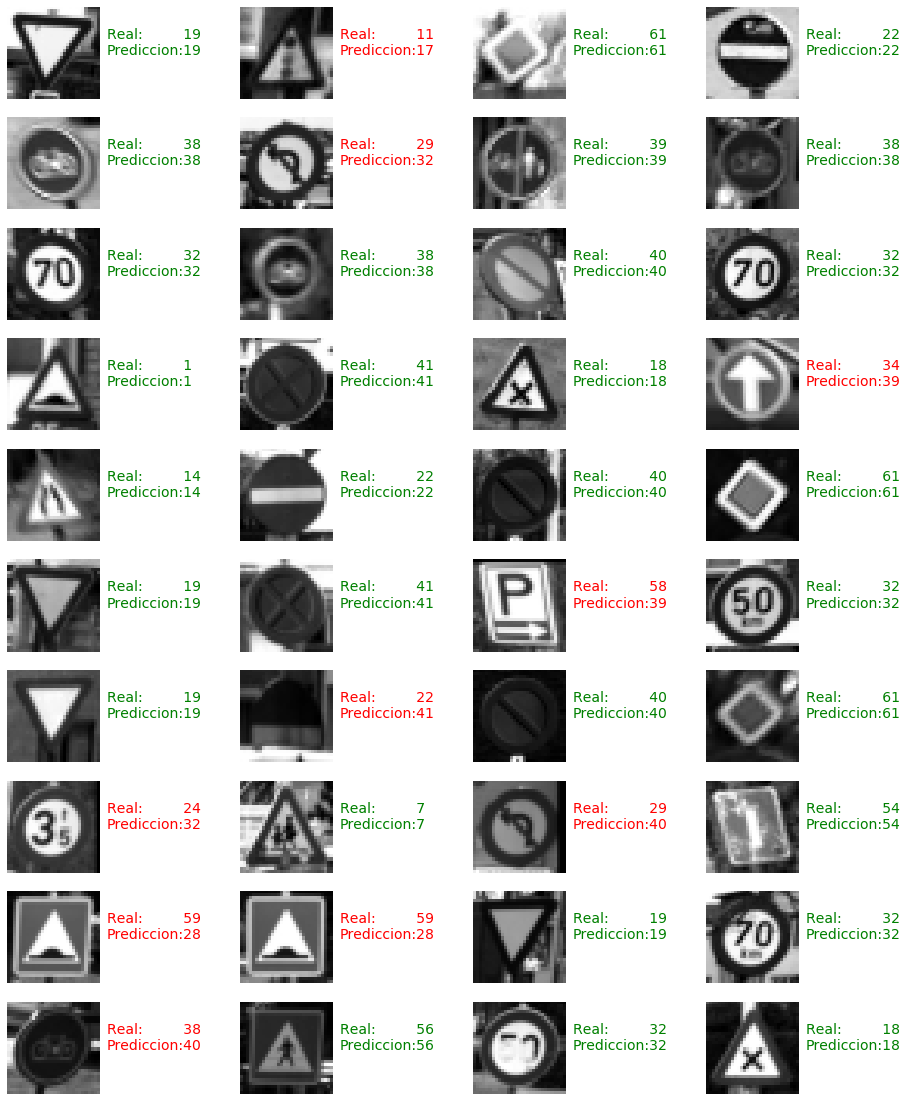

In [56]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [57]:
test_images, test_labels = load_ml_data(test_data_dir)

In [58]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [59]:
test_images30 = rgb2gray(np.array(test_images30))

In [60]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [61]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1811

In [62]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 71.87
